# 第9章 EM算法及其推广

# Expectation Maximization algorithm

### Maximum likehood function

[likehood & maximum likehood](http://fangs.in/post/thinkstats/likelihood/)

> 在统计学中，似然函数（likelihood function，通常简写为likelihood，似然）是一个非常重要的内容，在非正式场合似然和概率（Probability）几乎是一对同义词，但是在统计学中似然和概率却是两个不同的概念。概率是在特定环境下某件事情发生的可能性，也就是结果没有产生之前依据环境所对应的参数来预测某件事情发生的可能性，比如抛硬币，抛之前我们不知道最后是哪一面朝上，但是根据硬币的性质我们可以推测任何一面朝上的可能性均为50%，这个概率只有在抛硬币之前才是有意义的，抛完硬币后的结果便是确定的；而似然刚好相反，是在确定的结果下去推测产生这个结果的可能环境（参数），还是抛硬币的例子，假设我们随机抛掷一枚硬币1,000次，结果500次人头朝上，500次数字朝上（实际情况一般不会这么理想，这里只是举个例子），我们很容易判断这是一枚标准的硬币，两面朝上的概率均为50%，这个过程就是我们运用出现的结果来判断这个事情本身的性质（参数），也就是似然。

In [0]:
import numpy as np
import math
from sklearn.datasets import load_iris
import matplotlib as mpl
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer

### 例9.1

$$P(Y|\theta) = \prod[\pi p^{y_i}(1-p)^{1-y_i}+(1-\pi) q^{y_i}(1-q)^{1-y_i}]$$

### E step:

$$\mu^{i+1}=\frac{\pi (p^i)^{y_i}(1-(p^i))^{1-y_i}}{\pi (p^i)^{y_i}(1-(p^i))^{1-y_i}+(1-\pi) (q^i)^{y_i}(1-(q^i))^{1-y_i}}$$

### M step:

$$\pi^{i+1}=\frac{1}{n}\sum_{j=1}^n\mu^{i+1}_j$$

$$p^{i+1}=\frac{\sum_{j=1}^n\mu^{i+1}_jy_i}{\sum_{j=1}^n\mu^{i+1}_j}$$

$$q^{i+1}=\frac{\sum_{j=1}^n(1-\mu^{i+1}_jy_i)}{\sum_{j=1}^n(1-\mu^{i+1}_j)}$$

In [0]:
class EM:
    def __init__(self, prob):
        self.pro_A, self.pro_B, self.pro_C = prob
        
    # E step
    def _pmf(self, i):
        pro_1 = self.pro_A * math.pow(self.pro_B, data[i]) * math.pow((1-self.pro_B), 1-data[i])
        pro_2 = (1 - self.pro_A) * math.pow(self.pro_C, data[i]) * math.pow((1-self.pro_C), 1-data[i])
        return pro_1 / (pro_1 + pro_2)
    
    # M step
    def fit(self, X):
        N = len(X)
        for d in range(N):
            pmf = [self._pmf(k) for k in range(N)]
            pro_A = 1/ N * sum(pmf)
            pro_B = sum([pmf[k]*X[k] for k in range(N)]) / sum([pmf[k] for k in range(N)])
            pro_C = sum([(1-pmf[k])*X[k] for k in range(N)]) / sum([(1-pmf[k]) for k in range(N)])
            print('{}/{}  pro_a:{:.3f}, pro_b:{:.3f}, pro_c:{:.3f}'.format(d+1, N, pro_A, pro_B, pro_C))
            self.pro_A = pro_A
            self.pro_B = pro_B
            self.pro_C = pro_C
            
        return self

In [0]:
data=[1,1,0,1,0,0,1,0,1,1]

In [11]:
em = EM(prob=[0.5, 0.5, 0.5])
em.fit(data)

1/10  pro_a:0.500, pro_b:0.600, pro_c:0.600
2/10  pro_a:0.500, pro_b:0.600, pro_c:0.600
3/10  pro_a:0.500, pro_b:0.600, pro_c:0.600
4/10  pro_a:0.500, pro_b:0.600, pro_c:0.600
5/10  pro_a:0.500, pro_b:0.600, pro_c:0.600
6/10  pro_a:0.500, pro_b:0.600, pro_c:0.600
7/10  pro_a:0.500, pro_b:0.600, pro_c:0.600
8/10  pro_a:0.500, pro_b:0.600, pro_c:0.600
9/10  pro_a:0.500, pro_b:0.600, pro_c:0.600
10/10  pro_a:0.500, pro_b:0.600, pro_c:0.600


##### 9.1

In [12]:
em = EM(prob=[0.46, 0.55, 0.67])
em.fit(data)

1/10  pro_a:0.462, pro_b:0.535, pro_c:0.656
2/10  pro_a:0.462, pro_b:0.535, pro_c:0.656
3/10  pro_a:0.462, pro_b:0.535, pro_c:0.656
4/10  pro_a:0.462, pro_b:0.535, pro_c:0.656
5/10  pro_a:0.462, pro_b:0.535, pro_c:0.656
6/10  pro_a:0.462, pro_b:0.535, pro_c:0.656
7/10  pro_a:0.462, pro_b:0.535, pro_c:0.656
8/10  pro_a:0.462, pro_b:0.535, pro_c:0.656
9/10  pro_a:0.462, pro_b:0.535, pro_c:0.656
10/10  pro_a:0.462, pro_b:0.535, pro_c:0.656


##### 高斯混合模型 GMM

In [0]:
class GMM:
    def __init__(self, K, weights=None,means=None,covars=None, sigma=0.0000001):
        """
        :K: component
        :weigths: init weights
        :means: Gaussain mean
        :covars: Gaussain covars
        """
        self.K = K
        if weights is not None:
            self.weights = weights
        else:
            self.weights = np.random.rand(self.K)
            self.weights /= np.sum(self.K) # normlize, to make sure sum = 1
        
        self.means = means
        self.covars = covars
        self.sigma = sigma

    def _init_param(self, X):
        col = X.shape[1]
        if self.means is None:
            self.means = []
            for k in range(self.K):
                mean = np.random.rand(col)
                self.means.append(mean)
                
        if self.covars is None:
            self.covars = []
            for k in range(self.K):
                cov = np.random.rand(col, col)
                self.covars.append(cov) 
                
    def Gaussian(self, x, mean, cov):
        dim = np.shape(cov)[0]
        # cov的行列式为零时的措施
        covdet = np.linalg.det(cov + np.eye(dim) * 0.01)  #协方差矩阵的行列式
        covinv = np.linalg.inv(cov + np.eye(dim) * 0.01)  #协方差矩阵的逆
        xdiff = (x - mean).reshape((1,dim))
        # 概率密度
        prob = 1.0/(np.power(np.power(2*np.pi,dim)*np.abs(covdet),0.5))* np.exp(-0.5*xdiff.dot(covinv).dot(xdiff.T))[0][0]
        return prob

            
    def fit(self, X):
        self._init_param(X)
        
        loglikelyhood = 0.
        oldloglikelyhood = 1.
        length,dim = np.shape(X) 
        # gamma表示第n个样本属于第k个混合高斯的概率
        gammas = [np.zeros(self.K) for i in range(length)]
        while np.abs(loglikelyhood-oldloglikelyhood) > self.sigma:
            oldloglikelyhood = loglikelyhood
            # E-step
            for n in range(length):
                # respons是GMM的EM算法中的权重w，即后验概率
                respons = [self.weights[k] * self.Gaussian(X[n], self.means[k], self.covars[k])
                                                    for k in range(self.K)]
                sum_respons = np.sum(respons)
                gammas[n] = respons/sum_respons
            # M-step
            for k in range(self.K):
                #nk表示N个样本中有多少属于第k个高斯
                nk = np.sum([gammas[n][k] for n in range(length)])
                # 更新每个高斯分布的概率
                self.weights[k] = 1.0 * nk / length
                # 更新高斯分布的均值
                self.means[k] = (1.0/nk) * np.sum([gammas[n][k] * X[n] for n in range(length)], axis=0)
                xdiffs = X - self.means[k]
                # 更新高斯分布的协方差矩阵
                self.covars[k] = (1.0/nk)*np.sum([gammas[n][k]*xdiffs[n].reshape((dim,1)).dot(xdiffs[n].reshape((1,dim))) for n in range(length)],axis=0)
            loglikelyhood = []
            for n in range(length):
                tmp = [np.sum(self.weights[k]*self.Gaussian(X[n],self.means[k],self.covars[k])) for k in range(self.K)]
                tmp = np.log(np.array(tmp))
                loglikelyhood.append(list(tmp))
            loglikelyhood = np.sum(loglikelyhood)
        
        for i in range(length):
            gammas[i] = gammas[i]/np.sum(gammas[i])
        self.posibility = gammas
        self.prediction = [np.argmax(gammas[i]) for i in range(length)]
        
        return self.weights, self.means, self.covars
    
#https://blog.csdn.net/qq_30091945/article/details/81134598

##### 题9.3

In [0]:
data = np.array([-67, -48, 6, 8, 14, 16, 23, 24, 28, 29, 41, 49, 56, 60, 75]).reshape(-1,1)
data = Normalizer().fit_transform(data)

In [130]:
gmm = GMM(K=2)
gmm.fit(data)

(array([0.86666667, 0.13333333]),
 [array([1.]), array([-1.])],
 [array([[5.53558611e-87]]), array([[5.53558611e-87]])])

##### test

In [112]:
# 导入Iris数据集
iris = load_iris()
label = np.array(iris.target)
data = np.array(iris.data)
print("Iris label：\n",label)

Iris label：
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


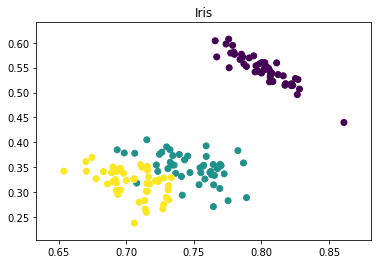

In [124]:
# 对数据进行预处理
data = Normalizer().fit_transform(data)

# 数据可视化
plt.scatter(data[:,0],data[:,1],c = label)
plt.title("Iris")
plt.show()


GMM预测结果：
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
GMM正确率为：
 0.6666666666666666


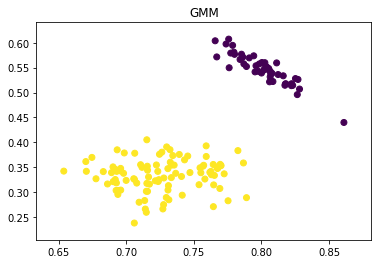

In [125]:
# GMM模型
K = 3
gmm = GMM(K)
gmm.fit(data)
y_pre = gmm.prediction
print("GMM预测结果：\n",y_pre)
print("GMM正确率为：\n",accuracy_score(label,y_pre))
plt.scatter(data[:, 0], data[:, 1], c=y_pre)
plt.title("GMM")
plt.show()